# Capstone Project: EDA <br>

#### Brandie Hatch

### Exploratory Data Analysis, Cleaning, and Feature Engineering

- Problem Statement
- Overview
- Import Data
- Pre-EDA Data Cleaning
- EDA

## Problem Statement<br>
__Problem:__ 

__Goal:__ Create a model that most accurately predicts Sex from school level, income, occupation, age, race, and marital status Census Data. 

__Question:__ As the gender gap in education (literacy) decreases, how does women’s participation in labor change?
How does women’s education levels and literacy change related to the country’s GDP, childhood mortality rate, and other factors?

## Overview <br>

According to the U.S. Census Bureau, the [definition of **sex**](https://www.census.gov/topics/population/age-and-sex/about.html) is based on the biological attributes of men and women (chromosomes, anatomy, and hormones). <br><br>
**Female persons in the United States account for 50.5%** of the population, from 331,449,281 total population estimates Census, April 1, 2020

- Please note the following from the U.S. Census Bureau's Age and Sex topic page: __Distinction between the concepts of gender and sex__<br>
"In general discussions, the concept of gender is often confused with the concept of sex, and the terms are used interchangeably. The meanings of these two concepts are not the same: *sex is based on the biological attributes of men and women (chromosomes, anatomy, hormones), while gender is a social construction whereby a society or culture assigns certain tendencies or behaviors to the labels of masculine or feminine.* These assignments may differ across cultures and among people within a culture, and even across time. Gender may or may not correspond directly to sex--depending on the society or culture or period. That means, for example, that people may associate themselves with femininity (as defined by their culture) while being biologically male. At the Census Bureau, the sex question wording very specifically intends to capture a person's biological sex and not gender. Ambiguity of these two concepts interferes with accurately and consistently measuring what we intend to measure--the sex composition of the population."

Data used in this project is from the US Census' American Community Survey (ACS) Public Use Microdata Sample (PUMS) files. <br>
Source: https://ask.census.gov/prweb/PRServletCustom?pyActivity=pyMobileSnapStart&ArticleID=KCP-2950


__Data Dictionary__

Features used listed below:
| **Feature**      | **Type** | **Dataset** | **Description**                                           |
|------------------|----------|-------------|-----------------------------------------------------------|
|    | _object_ | df          |                     |


Created with: https://www.tablesgenerator.com/markdown_tables#                                                             

## Import Data


In [9]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_columns =999

In [10]:
# read in data
df = pd.read_csv("./data/data_clean.csv")

## Pre-EDA Verification

In [11]:
print(df.shape)
df.head()

(3239553, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,35,1,1,0,6,0,2,1,0,-1,6250,63000,-1,1,1,0,17,0,0,0,1,63000,0,1,0,18
1,25,1,0,0,6,0,2,5,0,-1,9,0,-1,1,1,0,12,0,0,0,1,0,0,3,0,48
2,21,5,2,0,1,0,2,5,0,-1,4740,2000,-1,6,3,15,19,0,0,0,2,2000,0,1,0,18
3,49,1,1,0,6,0,2,3,0,-1,110,0,-1,1,1,0,21,1,2,0,1,0,0,2,0,4
4,18,1,1,0,6,0,2,5,0,-1,4110,6000,-1,1,2,15,16,0,0,0,2,6000,0,1,2,6


The data set includes 3,239,553 observations and 26 variables.

In [12]:
# dtypes and info for Data Dictionary above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239553 entries, 0 to 3239552
Data columns (total 26 columns):
 #   Column     Dtype
---  ------     -----
 0   AGEP       int64
 1   CIT        int64
 2   COW        int64
 3   ENG        int64
 4   ESR        int64
 5   FFSP       int64
 6   LANX       int64
 7   MAR        int64
 8   MULTG      int64
 9   NOC        int64
 10  OCCP       int64
 11  PINCP      int64
 12  POVPIP     int64
 13  RAC1P      int64
 14  SCH        int64
 15  SCHG       int64
 16  SCHL       int64
 17  SCIENGP    int64
 18  SCIENGRLP  int64
 19  SEMP       int64
 20  SEX        int64
 21  WAGP       int64
 22  WKEXREL    int64
 23  WKL        int64
 24  WRK        int64
 25  STATE      int64
dtypes: int64(26)
memory usage: 642.6 MB


In [13]:
df.isnull().sum().sum()

0

In [14]:
# want to figure out how to see if there are duplicates of rows

# check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())
df[duplicates]

137294


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
503,28,1,1,0,6,0,2,5,0,-1,7750,5000,-1,2,1,0,16,0,0,0,1,5000,0,1,0,39
882,51,1,1,0,2,0,2,3,0,-1,9620,4500,34,1,1,0,19,0,0,0,1,4500,0,1,2,39
931,34,1,0,0,6,0,2,5,0,-1,9,0,0,1,1,0,16,0,0,0,2,0,0,3,2,12
957,21,1,0,0,6,0,2,5,0,-1,9,2800,-1,2,2,15,19,0,0,0,2,0,0,3,2,37
1043,19,1,1,0,6,0,2,5,0,-1,2545,0,-1,2,1,0,16,0,0,0,1,0,0,2,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239299,2,1,0,0,0,0,0,5,1,2,9,-19999,501,1,0,0,0,0,0,-10001,2,-1,3,0,0,17
3239434,7,1,0,0,0,0,2,5,1,2,9,-19999,501,1,2,3,4,0,0,-10001,2,-1,1,0,0,32
3239484,9,1,0,0,0,0,2,5,1,2,9,-19999,501,9,2,6,6,0,0,-10001,2,-1,1,0,0,36
3239485,5,1,0,0,0,0,2,5,1,2,9,-19999,501,9,2,2,2,0,0,-10001,2,-1,1,0,0,36


## Explore Data

In [16]:
# Female persons in the United States account for 50.5%
# Key: 1 is Male, 2 is Female
df['SEX'].value_counts(normalize=True)

2    0.509706
1    0.490294
Name: SEX, dtype: float64

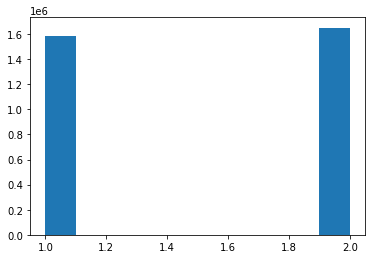

In [19]:
plt.hist(df['SEX']);

Sex: The dataset is pretty balanced regarding counts for males and females. Additionally, the dataset is  U.S. Census Bureau's estimate for 

In [6]:
# general statistics to see what the numeric data looks like 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGEP,3239553.0,42.224377,23.803392,0.0,22.0,43.0,62.0,96.0
CIT,3239553.0,1.423484,1.124021,1.0,1.0,1.0,1.0,5.0
COW,3239553.0,1.273874,1.805155,0.0,0.0,1.0,1.0,9.0
ENG,3239553.0,0.273249,0.702459,0.0,0.0,0.0,0.0,4.0
ESR,3239553.0,2.549088,2.491764,0.0,1.0,1.0,6.0,6.0
FFSP,3239553.0,0.023561,0.151678,0.0,0.0,0.0,0.0,1.0
LANX,3239553.0,1.729676,0.543544,0.0,2.0,2.0,2.0,2.0
MAR,3239553.0,2.914115,1.850704,1.0,1.0,3.0,5.0,5.0
MULTG,3239553.0,1.026430,0.345185,0.0,1.0,1.0,1.0,2.0
NOC,3239553.0,0.725370,1.265445,-1.0,0.0,0.0,1.0,14.0


__EDA Conclusion 1__ 
Mean, mode, etc

In [6]:
df = df.sample(n=10000, replace=False, axis=0, ignore_index=True, random_state=42)
print(df.shape)
df.head()

(10000, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,49,1,0,0,6,0,2,3,1,2,9,27800,136,1,1,0,19,0,0,0,1,0,12,3,2,26
1,70,1,0,0,6,0,2,2,1,0,9,38000,442,1,1,0,13,0,0,0,1,0,12,3,2,42
2,58,1,1,0,1,0,2,1,1,0,410,89000,501,1,1,0,16,0,0,0,1,89000,1,1,1,36
3,76,1,0,0,6,0,2,2,1,0,9,96400,501,1,1,0,21,2,2,0,1,0,0,3,2,17
4,57,1,0,0,6,0,2,3,1,0,9,9700,73,1,1,0,16,0,0,0,1,0,0,3,2,39


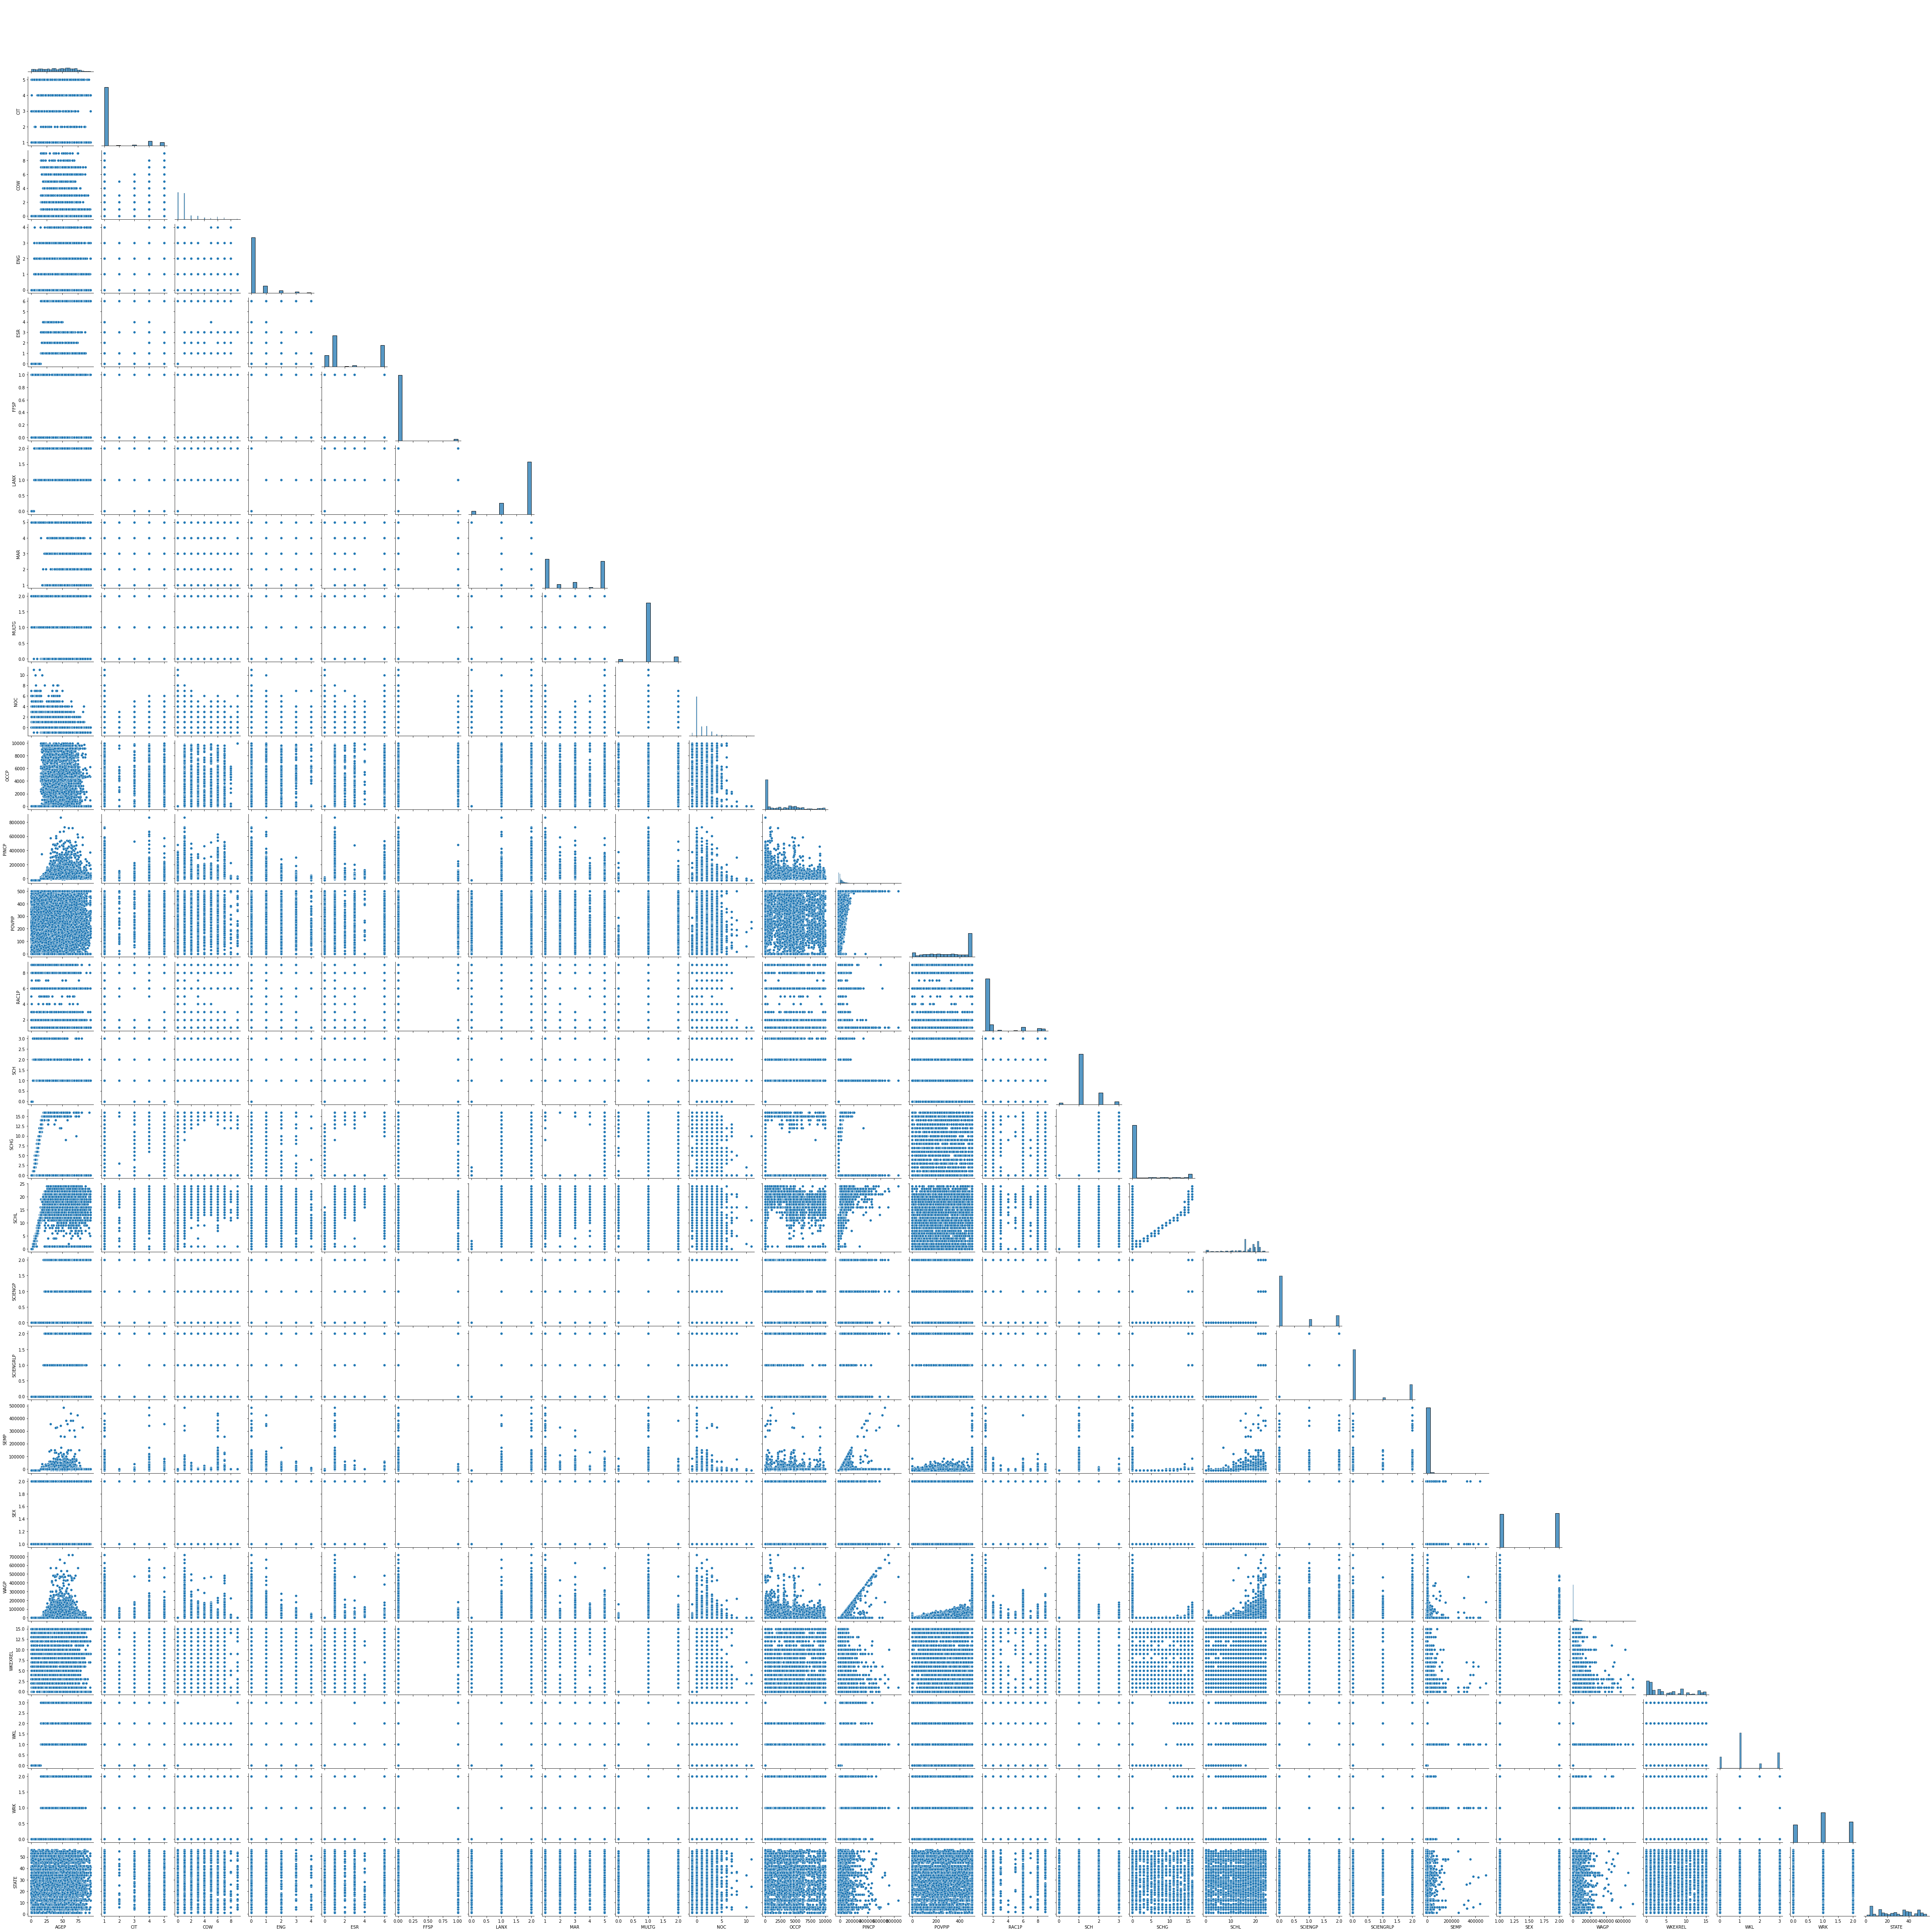

In [7]:
sns.pairplot(df, corner=True);

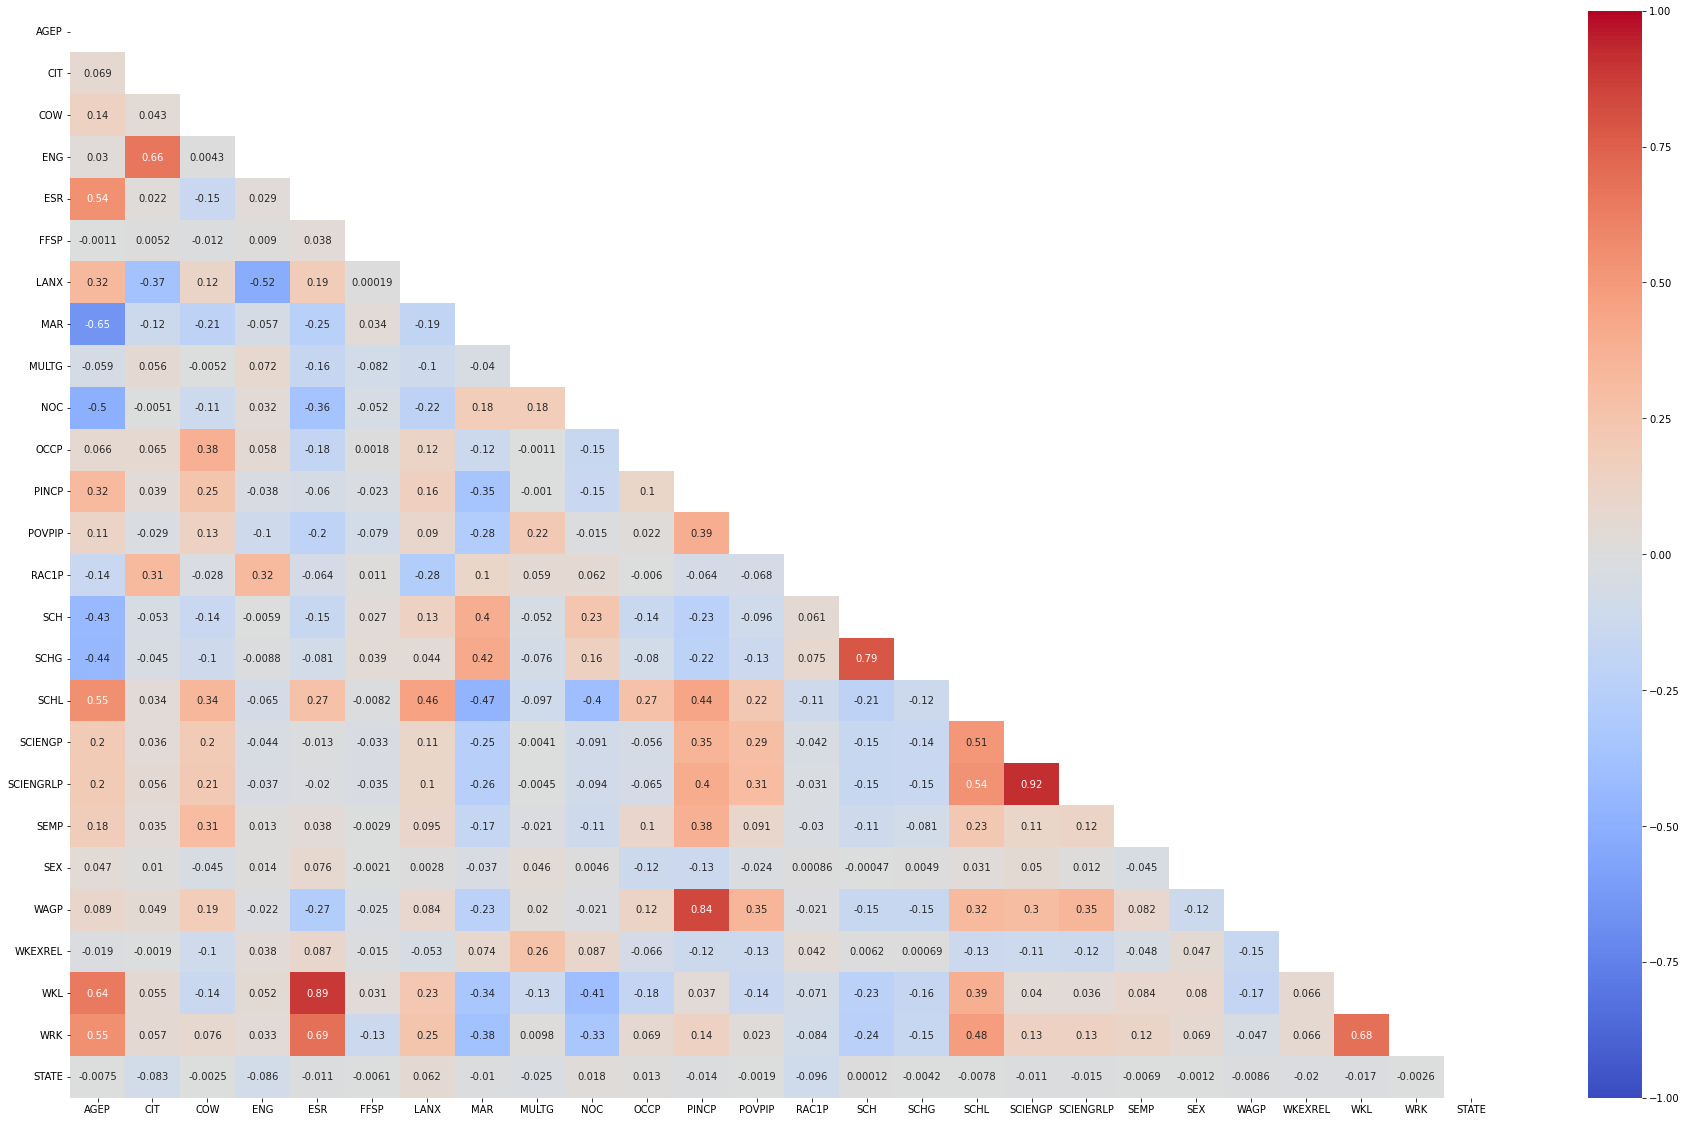

In [9]:
plt.figure(figsize=(32, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(
    df.corr(),
    vmin=-1, 
    vmax=1,
    annot=True,
    cmap='coolwarm',
    mask=mask
    );

In [10]:
df.corr()

,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
AGEP,1.000000,0.069296,0.135512,0.029519,0.544646,-0.001088,0.322812,-0.650494,-0.059180,-0.495901,0.065641,0.316581,0.114282,-0.141957,-0.432366,-0.444526,0.547444,0.196422,0.195871,0.175803,0.046613,0.089348,-0.019491,0.643548,0.553059,-0.007483
CIT,0.069296,1.000000,0.043261,0.661743,0.021983,0.005164,-0.371290,-0.123647,0.056011,-0.005102,0.065080,0.038512,-0.029311,0.313708,-0.053013,-0.045436,0.034342,0.035700,0.056086,0.034728,0.010453,0.049470,-0.001908,0.055432,0.056797,-0.082923
COW,0.135512,0.043261,1.000000,0.004313,-0.147659,-0.012035,0.116790,-0.214450,-0.005217,-0.113978,0.378639,0.248543,0.133235,-0.028133,-0.140872,-0.103987,0.338468,0.200398,0.213994,0.305612,-0.044850,0.185171,-0.099998,-0.135890,0.075709,-0.002456
ENG,0.029519,0.661743,0.004313,1.000000,0.028945,0.009023,-0.522195,-0.056888,0.072064,0.031935,0.058332,-0.037818,-0.104906,0.317199,-0.005860,-0.008782,-0.064969,-0.044145,-0.036798,0.013065,0.013789,-0.022395,0.038031,0.052426,0.032885,-0.085811
ESR,0.544646,0.021983,-0.147659,0.028945,1.000000,0.037589,0.190455,-0.249815,-0.161367,-0.359396,-0.175790,-0.059530,-0.204928,-0.064116,-0.148645,-0.080625,0.270749,-0.013264,-0.020407,0.037947,0.076258,-0.274127,0.086556,0.889984,0.685745,-0.011014
FFSP,-0.001088,0.005164,-0.012035,0.009023,0.037589,1.000000,0.000192,0.033556,-0.081517,-0.052273,0.001836,-0.023455,-0.078785,0.011168,0.027076,0.039112,-0.008166,-0.033480,-0.034706,-0.002873,-0.002080,-0.025470,-0.015366,0.031184,-0.131019,-0.006147
LANX,0.322812,-0.371290,0.116790,-0.522195,0.190455,0.000192,1.000000,-0.189364,-0.104741,-0.217361,0.119422,0.161775,0.089852,-0.279457,0.134217,0.043848,0.457715,0.109231,0.103347,0.095279,0.002763,0.084084,-0.053491,0.232438,0.246439,0.061951
MAR,-0.650494,-0.123647,-0.214450,-0.056888,-0.249815,0.033556,-0.189364,1.000000,-0.039982,0.183636,-0.120655,-0.353742,-0.284605,0.102284,0.397883,0.417254,-0.474004,-0.253063,-0.257680,-0.168519,-0.037470,-0.233945,0.073517,-0.340060,-0.379554,-0.010049
MULTG,-0.059180,0.056011,-0.005217,0.072064,-0.161367,-0.081517,-0.104741,-0.039982,1.000000,0.184479,-0.001052,-0.001018,0.215948,0.059153,-0.051585,-0.076103,-0.097319,-0.004140,-0.004462,-0.021499,0.046319,0.020018,0.263230,-0.131694,0.009774,-0.025020
NOC,-0.495901,-0.005102,-0.113978,0.031935,-0.359396,-0.052273,-0.217361,0.183636,0.184479,1.000000,-0.153847,-0.145242,-0.014665,0.062184,0.234847,0.156099,-0.402812,-0.091143,-0.093714,-0.107966,0.004642,-0.021336,0.087438,-0.405707,-0.334827,0.018402


__EDA Conclusion 1:__ <br>

After reviewing the correlation heatmap and the correlation figures, I decided to go to back to the data to clean a bit more. The correlations surrounding the race columns means that there are too many race topics for the problem statement and goals of this project. I removed the more specific race columns: 'RAC2P', 'RAC3P', 'RACAIAN', 'RACASN', 'RACBLK', 'RACNH', 'RACNUM', 'RACPI', 'RACSOR', 'RACWHT'.<br>

To note, these columns of data could be used in other projects for a deeper dive into different ways the other data points are connected to race. An image of the first heatmap with the above included specific race columns is included in the assets folder.

In [11]:
# Male = 1, Female = 2
df.groupby(['SEX']).mean()

,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,WAGP,WKEXREL,WKL,WRK,STATE
SEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.093078,1.411504,1.356422,0.263373,2.355346,0.023883,1.728144,2.984821,1.010128,0.719381,2834.673561,43730.705828,323.658693,1.901638,1.241385,2.193892,15.621420,0.378323,0.473405,1031.821355,33364.697513,4.501549,1.284327,0.98168,27.758208
2,43.312589,1.435008,1.194470,0.282750,2.735452,0.023252,1.731149,2.846103,1.042112,0.731130,2137.573414,26093.449436,315.384921,1.905315,1.240850,2.240207,15.999202,0.453429,0.493236,-560.767459,20129.443812,4.951180,1.449156,1.08624,27.718946


__EDA Conclusion 2:__ <br>

Assuming all else is constant, males in this data set are approximately two years younger than females on average. 

In [12]:
df.groupby(['STATE']).mean()

#Sort by age, to see highest and lowest
# Group into regions: Midwest, PNW, East, West, SW, S

,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK
STATE,,,,,,,,,,,,,,,,,,,,,,,,,
1,43.420618,1.116150,1.168901,0.062766,2.819817,0.025486,1.867581,2.827216,1.019764,0.630600,2505.269498,26931.389409,286.572004,1.483282,1.221448,2.067344,15.565034,0.328176,0.364985,-356.577645,1.521542,19942.253004,5.087230,1.482607,1.071084
2,37.051929,1.209815,1.559958,0.204412,2.340988,0.018910,1.687828,3.193757,1.036620,0.991745,2719.075191,28773.651508,294.710491,2.796188,1.223473,2.065436,14.789134,0.289209,0.337235,-385.056281,1.474261,23233.896143,5.123518,1.184902,0.987393
4,42.347951,1.407255,1.222824,0.317897,2.697102,0.022689,1.686463,2.961226,1.043557,0.757154,2333.443010,31221.378020,305.174611,1.937888,1.227297,2.203367,15.773676,0.396066,0.454933,-63.095919,1.503711,22881.621458,5.118679,1.417400,1.054436
5,42.328948,1.137782,1.182811,0.086274,2.750123,0.026938,1.841397,2.832517,1.017827,0.725323,2536.048581,24342.974016,269.675493,1.502845,1.223300,2.114890,15.194060,0.291221,0.318850,-423.964214,1.515607,18447.659705,5.023452,1.443015,1.052363
6,40.860457,1.913650,1.305535,0.633398,2.502156,0.023468,1.515663,3.034029,1.070333,0.733477,2363.651247,39850.063372,331.588270,3.098705,1.255983,2.488370,15.689303,0.438513,0.536214,836.166165,1.506773,31011.828520,4.984093,1.367230,1.017072
8,40.996902,1.280512,1.439887,0.170015,2.319100,0.015978,1.786532,2.863638,1.021525,0.754401,2426.674320,40030.540811,347.766967,1.666515,1.234941,2.228011,16.409576,0.530590,0.636310,664.220731,1.501278,31049.751269,4.200658,1.264306,1.008295
9,43.784080,1.476896,1.323683,0.271179,2.456883,0.027208,1.740486,2.904042,0.995953,0.634381,2382.533082,48605.391871,359.039744,1.822868,1.254933,2.303896,16.540221,0.542695,0.642532,1340.768677,1.514644,37010.472933,4.410844,1.339198,1.038395
10,45.003347,1.309362,1.287442,0.168016,2.690530,0.028507,1.804773,2.809740,1.042328,0.613865,2426.553288,38418.026671,343.132599,1.703164,1.221034,1.973437,16.320916,0.461181,0.534931,-34.302451,1.515279,26793.192420,4.939315,1.418637,1.048375
11,38.594403,1.439747,1.816459,0.200692,2.213028,0.053859,1.759440,3.559801,0.982699,0.404243,1964.735068,65509.029487,356.270348,2.121408,1.308861,2.492703,17.772830,0.769520,1.031142,1300.206860,1.534677,54412.015797,3.693997,1.258011,0.988265


In [13]:
# What is the highest grade level attained for people (over 18) split by Sex?

df[df['AGEP'] > 18].groupby('SEX').mean()['SCHL']
# df[df['AGEP'] > 18] filtering into the specific section of Age column (older than 18)

SEX
1    18.128708
2    18.315389
Name: SCHL, dtype: float64

(array([332703., 396706., 333539., 391728., 332722., 433001., 477585.,
        317071., 167440.,  57058.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <BarContainer object of 10 artists>)

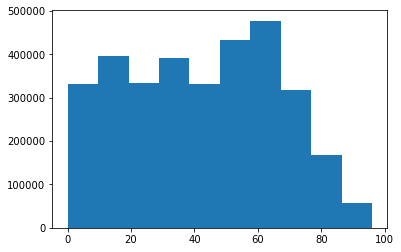

In [14]:
plt.hist(df['AGEP'])

(array([2.501187e+06, 3.038740e+05, 2.678900e+04, 2.027000e+03,
        0.000000e+00, 4.400000e+03, 1.795330e+05, 5.334000e+03,
        1.150990e+05, 1.013100e+05]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

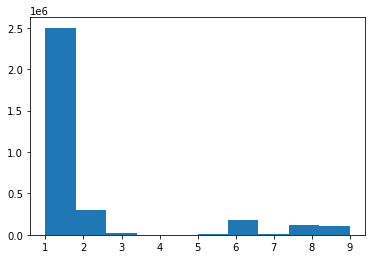

In [15]:
plt.hist(df['RAC1P'])

__EDA Conclusion 3:__ <br>

In addition to the heatmap correlations and the above histograms, I am going to remove the lowest correlation to Sex X variables (FFSP, LANX, NOC, RAC1P, SCH, SCHG) as a test before creating my X and y for modeling.  I want to see the effect on score and RMSE. 

**Improved score by 0.05. Did not get us closer past the Null RMSE versus not taking these variables out.**

In [17]:
#Go back to fundamental data science - do a T test, to see if age / sex are really different? Is it really different than the other one
# statistical way of actually figuring it out
# T test is better - -

In [32]:
dfs = df.sample(n=1000, replace=False, axis=0, ignore_index=True, random_state=42)
print(dfs.shape)
dfs.head()

(1000, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,49,1,0,0,6,0,2,3,1,2,9,27800,136,1,1,0,19,0,0,0,1,0,12,3,2,26
1,70,1,0,0,6,0,2,2,1,0,9,38000,442,1,1,0,13,0,0,0,1,0,12,3,2,42
2,58,1,1,0,1,0,2,1,1,0,410,89000,501,1,1,0,16,0,0,0,1,89000,1,1,1,36
3,76,1,0,0,6,0,2,2,1,0,9,96400,501,1,1,0,21,2,2,0,1,0,0,3,2,17
4,57,1,0,0,6,0,2,3,1,0,9,9700,73,1,1,0,16,0,0,0,1,0,0,3,2,39


In [36]:
ts, p = stats.ttest_ind(df["SEX"], df["AGEP"])
p

0.0

In [37]:
X = df[['SCHL', 'AGEP', 'OCCP', 'PINCP']]
y = df['SEX']

X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SEX   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                 4.030e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:26:33   Log-Likelihood:            -2.2720e+06
No. Observations:             3239553   AIC:                         4.544e+06
Df Residuals:                 3239548   BIC:                         4.544e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4140      0.001   1797.926      0.000       1.412       1.416
SCHL           0.0102   5.82e-05    175.656      0.000       0.010       0.010
AGEP           0.0010   1.37e-05     71.377      0.000       0.001       0.001
OCCP        -2.34e-05   9.69e-08   -241.406      0.000   -2.36e-05   -2.32e-05
PINCP       -1.42e-06   4.57e-09   -310.766      0.000   -1.43e-06   -1.41e-06
==============================================================================
Omnibus:                 12381611.654   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451345.266
Skew:                          -0.054   Prob(JB):                         0.00
Kurtosis:                       1.175   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__EDA Conclusion 3:__ <br>

Assuming all else is constant, the t-test shows.....

<function matplotlib.pyplot.show(close=None, block=None)>

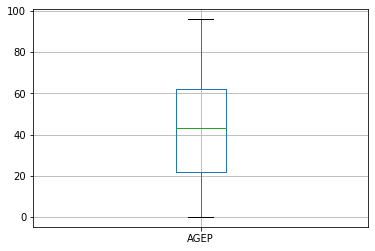

In [21]:
df.boxplot(column=['AGEP'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

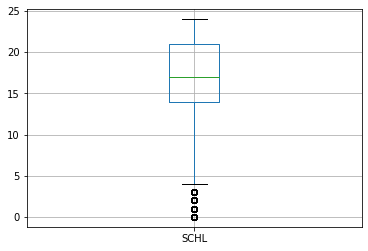

In [22]:
df.boxplot(column=['SCHL'])
plt.show

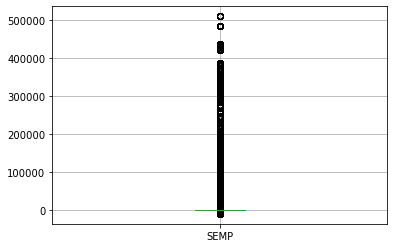

In [23]:
df.boxplot(column=['SEMP'])
plt.show;

## Feature Engineering

### States sorted by Census Regions and Divisions:

__Northeast Region__
- New England Division: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island and Vermont
- Middle Atlantic Division: New Jersey, New York and Pennsylvania<br>

__Midwest Region__
- East North Central Division: Illinois, Indiana, Michigan, Ohio and Wisconsin
- West North Central Division: Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota and South Dakota<br>

__South Region__
- South Atlantic Division: Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia and West Virginia
- East South Central Division: Alabama, Kentucky, Mississippi and Tennessee
- West South Central Division: Arkansas, Louisiana, Oklahoma and Texas<br>

__West Region__
- Mountain Division: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah and Wyoming
- Pacific Division: Alaska, California, Hawaii, Oregon and Washington

Source: https://www.census.gov/programs-surveys/economic-census/guidance-geographies/levels.html#par_textimage_34

In [ ]:
# Create feature for US Regions: West, South, Midwest, Northeast

In [ ]:
# Create feature for US Divisions
